In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
data = {
    'Student_ID': range(1, 101),
    'Math': np.random.randint(50, 100, 100).astype(object),
    'Physics': np.random.randint(40, 95, 100),
    'English': np.random.randint(30, 90, 100).astype(object),
    'Attendance': np.random.uniform(0.7, 1, 100).astype(object),
    'GPA': np.random.uniform(2.5, 4, 100)
}

data['Math'][10] = np.nan
data['Physics'][20] = 200  # introducing an outlier
data['English'][30] = 'A'  # introducing inconsistency

# Create DataFrame
df = pd.DataFrame(data)

In [2]:
df

,Student_ID,Math,Physics,English,Attendance,GPA
0,1,94,45,63,0.983236,3.573342
1,2,97,81,70,0.882476,3.229239
2,3,50,75,62,0.878997,3.562822
3,4,53,40,66,0.935093,3.247210
4,5,53,71,89,0.850008,3.766825
...,...,...,...,...,...,...
95,96,65,65,30,0.881943,3.574366
96,97,63,56,41,0.765521,2.540603
97,98,71,94,64,0.836551,3.597096
98,99,98,93,35,0.963661,3.650445


In [3]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Student_ID    0
Math          1
Physics       0
English       0
Attendance    0
GPA           0
dtype: int64


In [4]:
# Check for inconsistencies in 'English_Score'
inconsistent_data = pd.to_numeric(df['English'], errors='coerce').isnull().sum()
print("Inconsistencies in English_Score:", inconsistent_data)

Inconsistencies in English_Score: 1


In [5]:
print(df.isnull().sum())

Student_ID    0
Math          1
Physics       0
English       0
Attendance    0
GPA           0
dtype: int64


Text(0.5, 1.0, 'Boxplot of Numeric Variables')

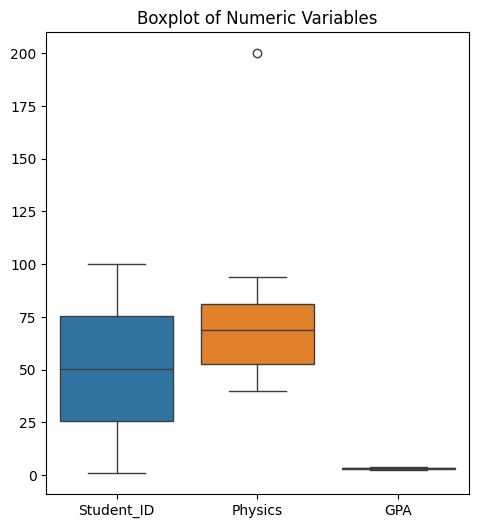

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numeric Variables')


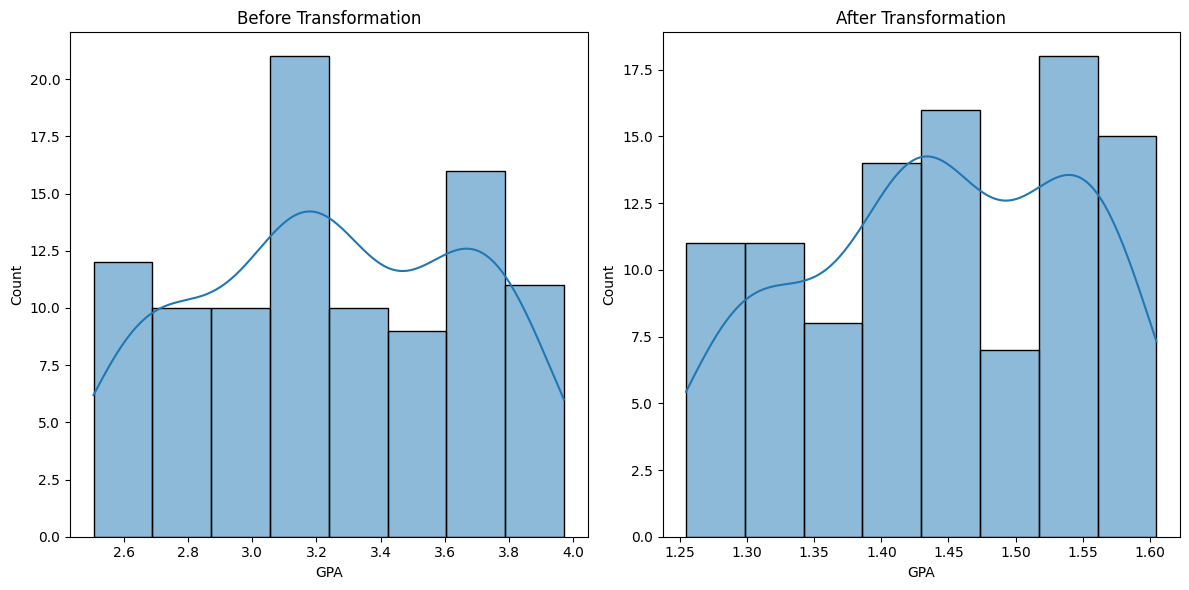

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

df_cleaned = df.dropna()  # Remove rows with NaN values
sns.histplot(df_cleaned['GPA'], kde=True)
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['GPA']), kde=True)
plt.title('After Transformation')

plt.tight_layout()
plt.show()

In [8]:
df['Math'].fillna(df['Math'].mean(), inplace=True)
df['Physics'] = np.where(df['Physics'] > 100, np.nan, df['Physics'])  # replacing outlier with NaN
df['English'] = pd.to_numeric(df['English'], errors='coerce')  # Convert to numeric, converting inconsistencies to NaN
df.dropna(inplace=True)  # Drop rows with NaN values

/tmp/ipykernel_32269/3475309136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Math'].fillna(df['Math'].mean(), inplace=True)
/tmp/ipykernel_32269/3475309136.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Math'].fillna(df['Math'].mean(), inplace=True)


In [9]:
print("After handling missing values and inconsistencies:")
print(df.isnull().sum())

After handling missing values and inconsistencies:
Student_ID    0
Math          0
Physics       0
English       0
Attendance    0
GPA           0
dtype: int64


Text(0.5, 1.0, 'Boxplot of Numeric Variables')

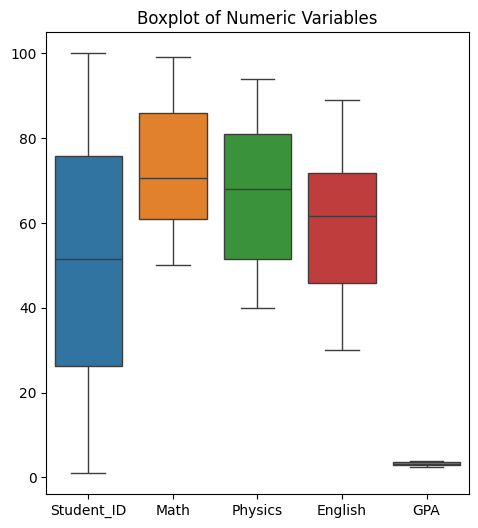

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numeric Variables')

In [11]:
z_scores = np.abs(zscore(df[numeric_cols]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
df_cleaned = df.drop(outlier_indices)
df_cleaned.dropna(subset=['GPA'], inplace=True)
df_cleaned['GPA'] = np.log1p(df_cleaned['GPA'])

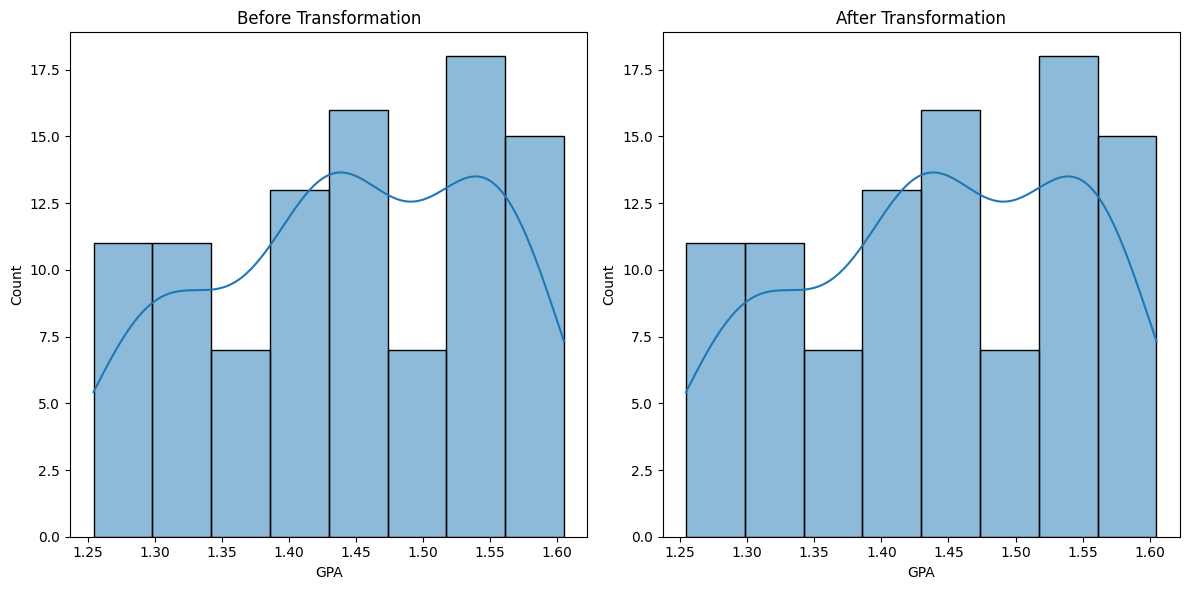

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['GPA'], kde=True)
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['GPA']), kde=True)
plt.title('After Transformation')

plt.tight_layout()
plt.show()